In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pbp = pd.read_csv('phipit.csv')
# pbp = pd.read_csv('torott.csv')

In [3]:
cols = {'ANA':'#694632','ARI':'#7d1db3','BOS':'#ffec00','BUF':'#b653fb','CAR':'#963e3e','CBJ':'#475483','CGY':'#b45300','CHI':'#8d6b0a','COL':'#6b051f','DAL':'#007f16','DET':'#ff0000','EDM':'#55483d','FLA':'#77d200','L.A':'#1f1f1f','MIN':'#003a07','MTL':'#ec0365','N.J':'#ab0027','NSH':'#f3bf00','NYI':'#0078ff','NYR':'#07b182','OTT':'#646464','PHI':'#ff7c00','PIT':'#19bcd1','SEA':'#05f6db','S.J':'#016072','STL':'#000df0','T.B':'#150078','TOR':'#363caf','VAN':'#5c6c98','VGK':'#bca900','WPG':'#928d92','WSH':'#4d0069'}

In [4]:
def fo_parser(desc):
    
    winner, players = desc.split(' - ')
    zone = winner.split(' ')[2][:3]
    winner = winner[:3]
    player1, player2 = players.split(' vs ')
    team1 = player1[:3]
    team2 = player2[:3]
    
    if team1 == winner:
        winning_player = player1.split(' ')[-1]
        winning_team = team1
        losing_player = player2.split(' ')[-1]
        losing_team = team2
    elif team2 == winner:
        winning_player = player2.split(' ')[-1]
        winning_team = team2
        losing_player = player1.split(' ')[-1]
        losing_team = team1
        
    return zone, winning_player, winning_team, losing_player, losing_team

In [20]:
# def advantager(cf, sf, fw, pd, g, t, s):
    
#     return 0.1267380595068711*cf + 0.2797557173984735*sf + 0.08639459801588804*fw + 0.06876239334454985*pd + 0.08165454758042826*g + 0.09950296398800655*t + 0.25719172016578284*s

In [5]:
def advantager(cf, sf, fw, pd, g, t, s):
    
    return 0.16568074432972932*cf + 0.24516896402506547*sf + 0.09792658777862182*fw + 0.07289580683179805*pd + 0.08731735986898974*g + 0.1082691462174373*t + 0.22274139094835835*s

In [6]:
def percentager(a, b):
    if a + b == 0:
        c = 0.5
    else:
        c = a / (a + b)
    return c

In [7]:
home_team = pbp['Home_Team'][0]
away_team = pbp['Away_Team'][0]
events = pbp['Event']
descriptions = pbp['Description']

home_advantage = np.zeros(len(events))
away_advantage = np.zeros(len(events))
home_advantage_err = np.zeros(len(events))
away_advantage_err = np.zeros(len(events))
corsi_for_home = 0
corsi_for_away = 0
sog_for_home = 0
sog_for_away = 0
goals_for_home = 0
goals_for_away = 0
f_home = 0
f_away = 0
pmins_drawn_home = 0
pmins_drawn_away = 0
gives_against_home = 0
gives_against_away = 0
takes_for_home = 0
takes_for_away = 0

n = 0 # for SEM

for j, e in enumerate(events):
    
    n += 1

    if e == 'SHOT':
        if descriptions[j].startswith(home_team):
            corsi_for_home += 1
            sog_for_home += 1
        elif descriptions[j].startswith(away_team):
            corsi_for_away += 1
            sog_for_away += 1

    elif e == 'GOAL':
        if descriptions[j].startswith(home_team):
            corsi_for_home += 1
            sog_for_home += 1
            goals_for_home += 1
        elif descriptions[j].startswith(away_team):
            corsi_for_away += 1
            sog_for_away += 1
            goals_for_away += 1

    elif e == 'BLOCK' or e == 'MISS':
        if descriptions[j].startswith(home_team):
            corsi_for_home += 1
        elif descriptions[j].startswith(away_team):
            corsi_for_away += 1

    elif e == 'PENL':
        p_team = descriptions[j].split(' ')[0]
        mins = int(descriptions[j].split(' min)')[0].split('(')[-1])
        if p_team == home_team:
            pmins_drawn_away += mins
        elif p_team == away_team:
            pmins_drawn_home += mins

    elif e == 'FAC':
        z, w, wt, l, lt = fo_parser(descriptions[j])
        if wt == home_team:
            f_home += 1
        elif wt == away_team:
            f_away += 1

    elif e == 'GIVE':
        if descriptions[j].startswith(home_team):
            gives_against_away += 1
        elif descriptions[j].startswith(away_team):
            gives_against_home += 1

    elif e == 'TAKE':
        if descriptions[j].startswith(home_team):
            takes_for_home += 1
        elif descriptions[j].startswith(away_team):
            takes_for_away += 1
            
    cf_home = percentager(corsi_for_home, corsi_for_away)
    cf_away = percentager(corsi_for_away, corsi_for_home)
    sf_home = percentager(sog_for_home, sog_for_away)
    sf_away = percentager(sog_for_away, sog_for_home)
    gf_home = percentager(goals_for_home, goals_for_away)
    gf_away = percentager(goals_for_away, goals_for_home)
    fp_home = percentager(f_home, f_away)
    fp_away = percentager(f_away, f_home)
    pd_home = percentager(pmins_drawn_home, pmins_drawn_away)
    pd_away = percentager(pmins_drawn_away, pmins_drawn_home)
    ga_home = percentager(gives_against_home, gives_against_away)
    ga_away = percentager(gives_against_away, gives_against_home)
    tf_home = percentager(takes_for_home, takes_for_away)
    tf_away = percentager(takes_for_away, takes_for_home)
    saves_home = sog_for_away - goals_for_away
    saves_away = sog_for_home - goals_for_home
    sp_home = percentager(saves_home, saves_away)
    sp_away = percentager(saves_away, saves_home)
    
    home_advantage[j] = advantager(cf_home, sf_home, fp_home, pd_home, ga_home, tf_home, sp_home)
    away_advantage[j] = advantager(cf_away, sf_away, fp_away, pd_away, ga_away, tf_away, sp_away)
    
    home_advantage_err[j] = np.std((cf_home, sf_home, fp_home, pd_home, ga_home, tf_home, sp_home)) / np.sqrt(n)
    away_advantage_err[j] = np.std((cf_away, sf_away, fp_away, pd_away, ga_away, tf_away, sp_away)) / np.sqrt(n)

In [8]:
minutes = (pbp['Seconds_Elapsed'] + 1200*(pbp['Period']-1)) / 60

<IPython.core.display.Javascript object>


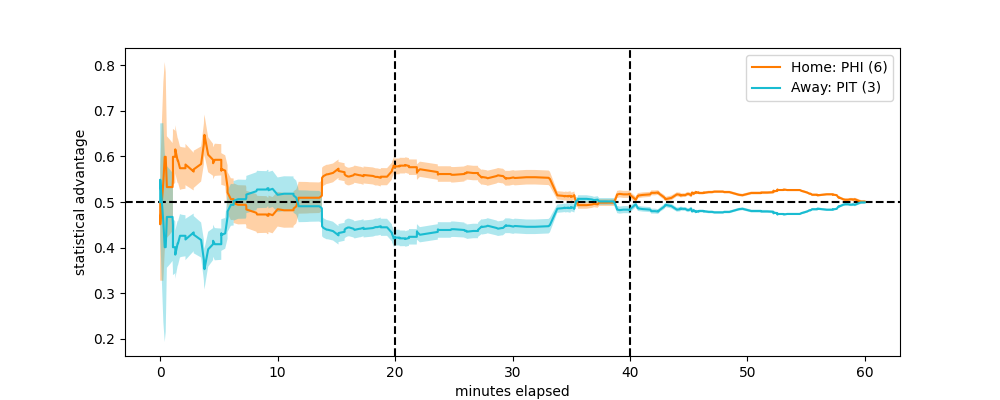

Text(0, 0.5, 'statistical advantage')

In [9]:
%matplotlib notebook

fig = plt.figure(figsize=(10,4))

plt.axhline(0.5, c='k', ls='--')
plt.axvline(20, c='k', ls='--')
plt.axvline(40, c='k', ls='--')
plt.plot(minutes, home_advantage, '-', label=f'Home: {home_team} ({goals_for_home})', c=cols[f'{home_team}'])
plt.plot(minutes, away_advantage, '-', label=f'Away: {away_team} ({goals_for_away})', c=cols[f'{away_team}'])
plt.fill_between(minutes, home_advantage-home_advantage_err, home_advantage+home_advantage_err, color=cols[f'{home_team}'], alpha=0.35, edgecolor=None)
plt.fill_between(minutes, away_advantage-away_advantage_err, away_advantage+away_advantage_err, color=cols[f'{away_team}'], alpha=0.35, edgecolor=None)
plt.legend(loc='upper right')
plt.xlabel('minutes elapsed')
plt.ylabel('statistical advantage')

In [10]:
def moving_average(x, w): # https://stackoverflow.com/questions/14313510/how-to-calculate-rolling-moving-average-using-python-numpy-scipy
    return np.convolve(x, np.ones(w), 'valid') / w

In [11]:
w = 10
ha = moving_average(home_advantage, w)
hae = moving_average(home_advantage_err, w)
aa = moving_average(away_advantage, w)
aae = moving_average(away_advantage_err, w)
events = moving_average(minutes, w)

<IPython.core.display.Javascript object>


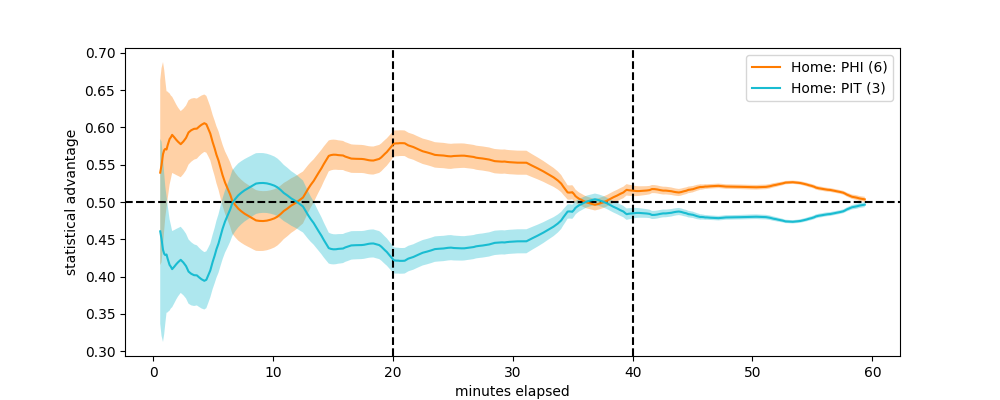

Text(0, 0.5, 'statistical advantage')

In [12]:
%matplotlib notebook

fig = plt.figure(figsize=(10,4))

plt.axhline(0.5, c='k', ls='--')
plt.axvline(20, c='k', ls='--')
plt.axvline(40, c='k', ls='--')
plt.fill_between(events, ha-hae, ha+hae, color=cols[f'{home_team}'], alpha=0.35, edgecolor=None)
plt.fill_between(events, aa-aae, aa+aae, color=cols[f'{away_team}'], alpha=0.35, edgecolor=None)
plt.plot(events, ha, '-', label=f'Home: {home_team} ({goals_for_home})', c=cols[f'{home_team}'])
plt.plot(events, aa, '-', label=f'Home: {away_team} ({goals_for_away})', c=cols[f'{away_team}'])
plt.legend(loc='upper right')
plt.xlabel('minutes elapsed')
plt.ylabel('statistical advantage')